In [1]:
#Data:images
# Download manually images from google
#download dataset from kaggle.Com
#build an image web crawler
#Use python librairies to scrape images.



# !pip install ipython-autotime
%load_ext autotime


time: 0 ns (started: 2024-07-10 14:07:01 +01:00)


In [2]:
# !pip install bing_image_downloader

time: 0 ns (started: 2024-07-10 14:07:01 +01:00)


In [3]:
# !mkdir samples


time: 0 ns (started: 2024-07-10 14:07:01 +01:00)


In [5]:
# from bing_image_downloader import downloader 



time: 0 ns (started: 2024-07-10 14:07:01 +01:00)


In [6]:
# from bing_image_downloader import downloader 



time: 15 ms (started: 2024-07-10 14:07:01 +01:00)


In [27]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


time: 0 ns (started: 2024-07-10 14:16:34 +01:00)


In [28]:
#Flatten all the datas ( très important ^^ on oublie pas)

#1- resizing
#2-applatir(flatten)
target= []
images= []
flat_data = []


DATADIR = 'samples/'
CATEGORIES = ['thumbs down', 'thumbs up']

for category in CATEGORIES: 
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR, category)
    
    for img in os.listdir(path):
        
        # check file extension
        if img.endswith('.jpg') or img.endswith('.jpeg') or img.endswith('.png'):
            try:
                img_array = imread(os.path.join(path, img))
                # print(img_array)
                #plt.imshow(img_array)

                # resize image to (100, 100) and flatten
                img_resized = resize(img_array, (150, 150,3))#normalizes the value from 0 to 1
                flat_img = img_resized.flatten()
                # append flattened image to list
                flat_data.append(flat_img)
                images.append(img_resized)
                target.append(class_num)
            except Exception as e:
                print(f"Error reading file: {img}. {e}")
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

# Convert target to categorical
target = to_categorical(target)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(images, target, test_size=0.2, random_state=42)


time: 9.95 s (started: 2024-07-10 14:17:01 +01:00)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Binary classification

# Model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 36, 36, 64)       

In [30]:
len(flat_data[0]) #150*150*3

67500

time: 0 ns (started: 2024-07-10 14:17:38 +01:00)


In [34]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

time: 16 ms (started: 2024-07-10 14:22:07 +01:00)


In [32]:
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    validation_data=(x_val, y_val), 
                    batch_size=32)


Epoch 1/20
22/22 [==============================] - 15s 610ms/step - loss: 0.8824 - accuracy: 0.5682 - val_loss: 0.6882 - val_accuracy: 0.5858
Epoch 2/20
22/22 [==============================] - 12s 560ms/step - loss: 0.6931 - accuracy: 0.5905 - val_loss: 0.6804 - val_accuracy: 0.5858
Epoch 3/20
22/22 [==============================] - 12s 557ms/step - loss: 0.6799 - accuracy: 0.5950 - val_loss: 0.6776 - val_accuracy: 0.5858
Epoch 4/20
22/22 [==============================] - 13s 581ms/step - loss: 0.6866 - accuracy: 0.5935 - val_loss: 0.6800 - val_accuracy: 0.5858
Epoch 5/20
22/22 [==============================] - 13s 571ms/step - loss: 0.6765 - accuracy: 0.5950 - val_loss: 0.6839 - val_accuracy: 0.5858
Epoch 6/20
22/22 [==============================] - 13s 574ms/step - loss: 0.6745 - accuracy: 0.5950 - val_loss: 0.6879 - val_accuracy: 0.5799
Epoch 7/20
22/22 [==============================] - 12s 565ms/step - loss: 0.6662 - accuracy: 0.6113 - val_loss: 0.6835 - val_accuracy: 0.5976

6/6 [==============================] - 1s 98ms/step - loss: 0.9141 - accuracy: 0.6923
Validation Loss: 0.9141122698783875
Validation Accuracy: 0.692307710647583


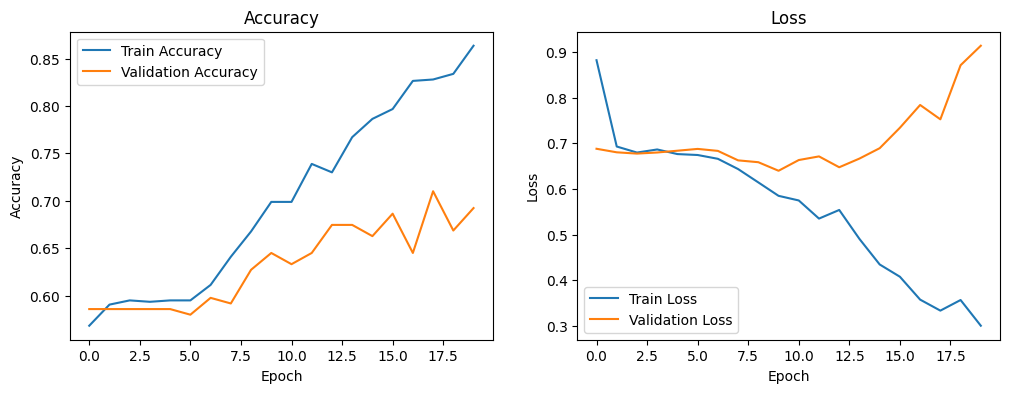

time: 1.17 s (started: 2024-07-10 14:22:09 +01:00)


In [36]:
# Evaluate the model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')

plt.show()


In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# accuracy_score(y_pred, y_test)